In [219]:
import pandas as pd
import numpy as np
import re
import warnings
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_json("stage1.json")

In [3]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Type', 'Next Inspection', 'Inspection new',
       'Warranty', 'Make', 'Model', 'First Registration', 'Body Color',
       'Upholstery', 'Body', 'Nr. of Doors', 'Nr. of Seats', 'Gearing Type',
       'Displacement', 'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'Emission Label', 'Gears', 'Country version'],
      dtype='object')

In [4]:
df.head()

,make_model,body_type,price,vat,km,registration,prev_owner,hp,Type,Next Inspection,Inspection new,Warranty,Make,Model,First Registration,Body Color,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Weight,Drive chain,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Emission Label,Gears,Country version
0,Audi A1,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,66 kW,"[, Used, , Diesel (Particulate Filter)]","[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]",,\nAudi\n,"[\n, A1, \n]","[\n, 2016, \n]","[\n, Black, \n]","[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]","[\n1,220 kg\n]",[\nfront\n],"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",None,None,None
1,Audi A1,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,141 kW,"[, Used, , Gasoline]",None,None,None,\nAudi\n,"[\n, A1, \n]","[\n, 2017, \n]","[\n, Red, \n]","[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]","[\n1,255 kg\n]",[\nfront\n],"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n4 (Green)\n],[\n7\n],None
2,Audi A1,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,85 kW,"[, Used, , Diesel (Particulate Filter)]",None,None,,\nAudi\n,"[\n, A1, \n]","[\n, 2016, \n]","[\n, Black, \n]","[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",None,[\nfront\n],"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",[\n4 (Green)\n],None,None
3,Audi A1,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,66 kW,"[, Used, , Diesel (Particulate Filter)]",None,None,None,\nAudi\n,"[\n, A1, \n]","[\n, 2016, \n]","[\n, Brown, \n]",None,"[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,422 cc\n]","[\n1,195 kg\n]",None,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",None,[\n6\n],None
4,Audi A1,Sedans,16790,None,"16,200 km",05/2016,1 previous owner,66 kW,"[, Used, , Diesel (Particulate Filter)]",None,"[\nYes\n, \n109 g CO2/km (comb)\n]",,\nAudi\n,"[\n, A1, \n]","[\n, 2016, \n]","[\n, Black, \n]","[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",None,[\nfront\n],"[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",[\n109 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...",None,None,[\nGermany\n]


### Öncelikle Dublicate satırları düşüyoruz. 

In [5]:
df.shape

(15919, 34)

In [6]:
df.shape

(15919, 34)

### make_model 
**Bu sütunda yer alan veriler üzerinde herhangi bir cleaning işlemi yapmaya gerek yok.**

In [7]:
df.make_model.sample(5)
    

9784       Opel Corsa
13638    Renault Clio
2661          Audi A3
6157       Opel Astra
758           Audi A1
Name: make_model, dtype: object

In [8]:
df.make_model.isnull().sum()

0

### body_type
**bu sütun üzerinde data cleaning işlemi yapmaya gerek yok.

In [9]:
df.body_type.isnull().sum()

60

In [10]:
df.body_type.value_counts()


Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [11]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Type', 'Next Inspection', 'Inspection new',
       'Warranty', 'Make', 'Model', 'First Registration', 'Body Color',
       'Upholstery', 'Body', 'Nr. of Doors', 'Nr. of Seats', 'Gearing Type',
       'Displacement', 'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'Emission Label', 'Gears', 'Country version'],
      dtype='object')

### price

**Bu sütunda integer değerler var ve veri tipi de integer. Null değerler yok fakat outlier değerler var.**

In [12]:
df.price.dtype

dtype('int64')

In [13]:
df.price.isnull().sum()

0

In [14]:
min_price,max_price = min(df.price), max(df.price)

In [15]:
[min_price,max_price]

[13, 74600]

**Outlier değerler var bunlar ile daha sonra ilgileneceğiz. Outlier değerleri tespit edip bunlar ile ilgili 
karar vereceğiz.**

### vat 
**bu sütunda yer alan değerler için web sitesini incelediğimiz zaman 2 farklı seçenek vardı.
bunlardan null olanları false diğerlerini True yaptık.** 

In [16]:
df.vat.sample(5)

2553               None
3803     VAT deductible
10247    VAT deductible
9531     VAT deductible
330                None
Name: vat, dtype: object

In [17]:
df.vat.unique()

array(['VAT deductible', 'Price negotiable', None], dtype=object)

In [18]:
df.vat.value_counts()

VAT deductible      10980
Price negotiable      426
Name: vat, dtype: int64

In [19]:
df.vat.isnull().sum()

4513

In [20]:
type(df.vat[4])

NoneType

In [21]:
df.vat = df.vat.map(lambda x: False if x == None else True)

In [22]:
df.vat.value_counts()

True     11406
False     4513
Name: vat, dtype: int64

In [23]:
np.nan == np.nan  # np.nan özel bir değer. kendisine bile eşit değil.

False

In [24]:
type(np.nan)  # değer tipi olarak float döndürür.

float

### km 
**sütunu string veri tipinde. Bu sütunu temizleyip integer veri tipine çevirmeliyiz.** 

In [25]:
df.km

0        56,013 km
1        80,000 km
2        83,450 km
3        73,000 km
4        16,200 km
           ...    
15914         - km
15915     9,900 km
15916        15 km
15917        10 km
15918         - km
Name: km, Length: 15919, dtype: object

In [26]:
df.km = df.km.str.replace(',','').str.strip(' km').replace('-', np.nan).astype(float)


**km sütunu içinde yer alan non-integer ifadeler temizlendi. Yerlerine nan değerler atandı. Nan değerlerin yerine**
**diğer sütunlar incelendikten sonra ortalama bir km değeri atamayı planlıyoruz. Şimdilik işlem yapılmadı.**

In [27]:
df.km.isnull().sum()

1024

In [28]:
df[df.km.isnull()]['First Registration'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, 2019, \n]    147
[\n, 2018, \n]     38
[\n, 2017, \n]      1
Name: First Registration, dtype: int64

### registration Sütunu

**Veri tipini datetime tipine çevirmeliyiz. Çünkü tarih verisi içeriyor.** 

In [29]:
df.registration.head()

0    01/2016
1    03/2017
2    02/2016
3    08/2016
4    05/2016
Name: registration, dtype: object

In [30]:
df.registration.isnull().sum()

0

In [31]:
df.registration = df.registration.replace('-/-', np.nan)


In [32]:
df.registration = pd.to_datetime(df.registration)


In [33]:
df["First Registration"].isnull().sum()

1597

In [34]:
df.registration.isnull().sum()

1597

In [35]:
df[['First Registration','registration']].sample(5)
# first registration sütunun  ile registration sütunu benzer değerleri içerdiği için
# first registration sütunu drop edilebilir

,First Registration,registration
6816,"[\n, 2017, \n]",2017-09-01
3382,"[\n, 2016, \n]",2016-07-01
11205,"[\n, 2016, \n]",2016-10-01
648,"[\n, 2016, \n]",2016-10-01
9497,"[\n, 2019, \n]",2019-05-01


In [36]:
df.drop('First Registration',axis=1,inplace=True)

###  registration sütununda yer alan nan değerler için daha sonra tekrar bakılacak.

### 'prev_owner' sütunu
**arabanın kaçıncı el olduğu bilgisi yer alıyor. Bu sütunun daha anlamlı hale gelmesi için integer'a çevirilebilir.**

In [37]:
df.prev_owner.head()

0    2 previous owners
1                 None
2     1 previous owner
3     1 previous owner
4     1 previous owner
Name: prev_owner, dtype: object

In [38]:
df.prev_owner.unique()

array(['2 previous owners', None, '1 previous owner', '3 previous owners',
       '4 previous owners'], dtype=object)

In [39]:
df.prev_owner.isnull().sum()

6828

In [40]:
df.prev_owner = df.prev_owner.str.strip('previous owners').astype(float)


In [41]:
# df.prev_owner.map(lambda x: x.split()[0],na_action='ignore').astype(float)

### hp sütunu
** bu sütunu integer ya da float a çevirebiliriz.** 

In [42]:
df.hp.value_counts()

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
          ... 
123 kW       1
239 kW       1
4 kW         1
115 kW       1
132 kW       1
Name: hp, Length: 81, dtype: int64

In [43]:
df.hp

0         66 kW
1        141 kW
2         85 kW
3         66 kW
4         66 kW
          ...  
15914    147 kW
15915    165 kW
15916    146 kW
15917    147 kW
15918    165 kW
Name: hp, Length: 15919, dtype: object

In [44]:
df.hp = df.hp.str.strip(" kW").replace("-",np.nan).astype(float)

In [45]:
df.hp.isnull().sum()

88

### Type sütunu

In [46]:
df.Type

0                  [, Used, , Diesel (Particulate Filter)]
1                                     [, Used, , Gasoline]
2                  [, Used, , Diesel (Particulate Filter)]
3                  [, Used, , Diesel (Particulate Filter)]
4                  [, Used, , Diesel (Particulate Filter)]
                               ...                        
15914               [, New, , Diesel (Particulate Filter)]
15915    [, Used, , Super 95 / Super Plus 98 (Particula...
15916                         [, Pre-registered, , Diesel]
15917                         [, Pre-registered, , Diesel]
15918                        [, Demonstration, , Super 95]
Name: Type, Length: 15919, dtype: object

In [47]:
df.Type.map(lambda x: x[1],na_action='ignore').sample(5)
# siteyi incelediğimiz bu bilgilerin "Vehicle condition" olarak karşımıza çıktığını görmekteyiz. Serda
# bu nedenle Vehicle condition sütunu oluşturup type sütununu parçalıyoruz.

338      Used
15422    Used
3860     Used
14827    Used
8015      New
Name: Type, dtype: object

In [48]:
df["Vehicle condition"] = df.Type.map(lambda x: x[1],na_action='ignore')


In [49]:
df["Vehicle condition"].head()

0    Used
1    Used
2    Used
3    Used
4    Used
Name: Vehicle condition, dtype: object

In [50]:
df.Type.map(lambda x: x[3],na_action='ignore').str.contains("Particulate Filter").sum()
# particulate filter içeren satır sayısı

4819

In [51]:
df["particul_filter"] = df.Type.map(lambda x: x[3], na_action='ignore').str.extract("\(([^)]+)").fillna(False)
# particule filter için regex denemesi () parantez içinde yer yazan 'particulate filter' string ifadeyi almak için
# içinde particulate filter yazmayan nan değerlere False atadık

In [52]:
df.particul_filter = df.particul_filter.map(lambda x: True if x else False)
# içinde particulate filter yazanları True yazmayanlar ise zaten false

In [53]:
df.particul_filter

0         True
1        False
2         True
3         True
4         True
         ...  
15914     True
15915     True
15916    False
15917    False
15918    False
Name: particul_filter, Length: 15919, dtype: bool

In [54]:
df["Fuel Type"] = df.Type.map(lambda x: x[3],na_action='ignore').str.extract("([^(]+)")
# ( karakterinden önceki her şeyi al 
# bu sayede araçların yakıt tiplerini çekmiş olacağız.

In [55]:
df["Fuel Type"]

0                          Diesel 
1                         Gasoline
2                          Diesel 
3                          Diesel 
4                          Diesel 
                   ...            
15914                      Diesel 
15915    Super 95 / Super Plus 98 
15916                       Diesel
15917                       Diesel
15918                     Super 95
Name: Fuel Type, Length: 15919, dtype: object

In [56]:
df.Type

0                  [, Used, , Diesel (Particulate Filter)]
1                                     [, Used, , Gasoline]
2                  [, Used, , Diesel (Particulate Filter)]
3                  [, Used, , Diesel (Particulate Filter)]
4                  [, Used, , Diesel (Particulate Filter)]
                               ...                        
15914               [, New, , Diesel (Particulate Filter)]
15915    [, Used, , Super 95 / Super Plus 98 (Particula...
15916                         [, Pre-registered, , Diesel]
15917                         [, Pre-registered, , Diesel]
15918                        [, Demonstration, , Super 95]
Name: Type, Length: 15919, dtype: object

In [57]:
# Type sütunundan Vehicle condition,  Fuel Type ve particul_filter olmak üzere yeni kolanlar oluşturduk
# Type sütunu artık düşebiliriz
df.drop('Type',axis=1, inplace=True)

In [58]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Next Inspection', 'Inspection new', 'Warranty',
       'Make', 'Model', 'Body Color', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Gearing Type', 'Displacement', 'Weight', 'Drive chain',
       'Consumption', 'CO2 Emission', 'Emission Class',
       '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n',
       '\nSafety & Security\n', 'Emission Label', 'Gears', 'Country version',
       'Vehicle condition', 'particul_filter', 'Fuel Type'],
      dtype='object')

### 'Next Inspection' sütunu

In [59]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Next Inspection', 'Inspection new', 'Warranty',
       'Make', 'Model', 'Body Color', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Gearing Type', 'Displacement', 'Weight', 'Drive chain',
       'Consumption', 'CO2 Emission', 'Emission Class',
       '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n',
       '\nSafety & Security\n', 'Emission Label', 'Gears', 'Country version',
       'Vehicle condition', 'particul_filter', 'Fuel Type'],
      dtype='object')

In [60]:
df['Next Inspection'].isnull().sum()

12384

In [61]:
# null sayısına bakılırsa bu sütunu düşebiliriz.


In [62]:
df.drop('Next Inspection',axis=1, inplace=True)

### 'Inspection new' Sütunu

In [63]:
df['Inspection new'].isnull().sum()

11987

In [64]:
# null sayısına bakılırsa bu sütunu da düşebiliriz.
df.drop('Inspection new',axis=1,inplace = True)

### 'Warranty' sütunu

In [65]:
df.Warranty.isnull().sum()

5420

In [66]:
sum(df.Warranty == "")

7703

In [67]:
df[df.Warranty == ""].shape

(7703, 33)

In [68]:
# null ve "" ifadeleri 13000 den fazla. Bu sütunun neredeyse tamamı da null. Düşülebilir. 
df.drop('Warranty',axis=1,inplace=True)

In [69]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Make', 'Model', 'Body Color', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'Emission Label', 'Gears', 'Country version', 'Vehicle condition',
       'particul_filter', 'Fuel Type'],
      dtype='object')

### Make ve Model Sütunları

In [70]:
df.Make = df.Make.str.strip("\n")

In [71]:
df.Make

0           Audi
1           Audi
2           Audi
3           Audi
4           Audi
          ...   
15914    Renault
15915    Renault
15916    Renault
15917    Renault
15918    Renault
Name: Make, Length: 15919, dtype: object

In [72]:
df.Model = df.Model.map(lambda x: x[1],na_action='ignore')

### 'Body Color' Sütunu

In [73]:
df['Body Color'] = df['Body Color'].map(lambda x: x[1],na_action='ignore')

In [74]:
df['Body Color']

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: Body Color, Length: 15919, dtype: object

In [75]:
df.Upholstery.map(lambda x: x).value_counts()
# bu sütunu incelediğimiz zaman arabaların koltuklarının deri mi kumaşmı olduğu bilgis ön plana çıkıyor. Ben fiyata etki edecek 
#olan kumaş mı deri mi kısmını alıp gerisini atacağım. 

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5821
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nCloth, Blue\n]              12
[\nBrown\n]                    12
[\nCloth, White\n]              8
[\nVelour, Gre

In [76]:
df.Upholstery.isnull().sum()

3720

In [77]:
df.Upholstery = df.Upholstery.map(lambda x: x[0].strip("\n").split(",")[0],na_action='ignore')

In [78]:
df.Upholstery.isnull().sum()

3720

In [79]:
df.Upholstery.unique()

array(['Cloth', None, 'Part leather', 'Full leather', 'Black', 'Other',
       'alcantara', 'Velour', 'Grey', 'Blue', 'White', 'Beige', 'Brown'],
      dtype=object)

In [80]:
df.Upholstery

0               Cloth
1               Cloth
2               Cloth
3                None
4               Cloth
             ...     
15914            None
15915           Cloth
15916    Full leather
15917    Part leather
15918    Full leather
Name: Upholstery, Length: 15919, dtype: object

In [81]:
color = ['Grey','Blue','White','Beige', 'Brown','Black','Other']

In [82]:
df.Upholstery = df.Upholstery.map(lambda x: None if x in color else x)

In [83]:
df.Upholstery

0               Cloth
1               Cloth
2               Cloth
3                None
4               Cloth
             ...     
15914            None
15915           Cloth
15916    Full leather
15917    Part leather
15918    Full leather
Name: Upholstery, Length: 15919, dtype: object

In [84]:
df.Upholstery.isnull().sum()

4871

### Body Sütunu

In [85]:
df.Body = df.Body.map(lambda x: x[1],na_action='ignore')

### 'Nr. of Doors' sütunu

In [86]:
df['Nr. of Doors'] = df['Nr. of Doors'].map(lambda x: x[0].strip("\n"),na_action='ignore')

In [87]:
df['Nr. of Doors'].value_counts()

5    11575
4     3079
3      832
2      219
1        1
7        1
Name: Nr. of Doors, dtype: int64

In [88]:
df['Nr. of Doors'].isnull().sum()

212

In [89]:
df['Nr. of Doors'] = df['Nr. of Doors'].astype(float)

In [90]:
df['Nr. of Doors'].dtype

dtype('float64')

### 'Gearing Type'

In [91]:
df['Gearing Type'].map(lambda x: x[1],na_action='ignore').unique()

array(['Automatic', 'Manual', 'Semi-automatic'], dtype=object)

In [92]:
df['Gearing Type'] = df['Gearing Type'].map(lambda x: x[1],na_action='ignore')

In [93]:
df['Gearing Type'].isnull().sum()

0

In [94]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Make', 'Model', 'Body Color', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'Emission Label', 'Gears', 'Country version', 'Vehicle condition',
       'particul_filter', 'Fuel Type'],
      dtype='object')

### 'Displacement' Sütunu

In [95]:
df['Displacement']

0        [\n1,422 cc\n]
1        [\n1,798 cc\n]
2        [\n1,598 cc\n]
3        [\n1,422 cc\n]
4        [\n1,422 cc\n]
              ...      
15914    [\n1,997 cc\n]
15915    [\n1,798 cc\n]
15916    [\n1,997 cc\n]
15917    [\n1,997 cc\n]
15918    [\n1,798 cc\n]
Name: Displacement, Length: 15919, dtype: object

In [96]:
df['Displacement'] = df['Displacement'].map(lambda x: x[0].strip(",\n1").strip(" cc"),na_action='ignore')

In [97]:
sum(df['Displacement'] == '')
# 36 tane '' değeri var.

36

In [98]:
df['Displacement'] = df['Displacement'].map(lambda x: x if x.isnumeric() else np.nan,na_action='ignore')

In [99]:
sum(df['Displacement'] == '')
# kodumu çalışmış

0

In [100]:
df['Displacement'] = df['Displacement'].astype(float)

In [101]:
df['Displacement'].isnull().sum()

601

In [102]:
sum(df.Displacement== 0.)

41

In [103]:
df.Displacement = df.Displacement.map(lambda x: np.nan if x == 0. else x)

In [104]:
sum(df.Displacement== 0.)

0

In [105]:
df['Displacement'].isnull().sum()

642

### Weight Sütunu

In [106]:
df.Weight[0]
# tek bir satır ile veri tipimizi tanımış olduk.
# weight sütununda birim yazmasına gerek yok. Bu sütunu da float yapabiliriz


['\n1,220 kg\n']

In [107]:
df.Weight = df.Weight.map(lambda x: x[0].strip('\n1,').strip(" kg"),na_action='ignore')

In [108]:
df.Weight.isnull().sum()

6974

### 'Drive chain' Sütunu


In [109]:
df['Drive chain']

0        [\nfront\n]
1        [\nfront\n]
2        [\nfront\n]
3               None
4        [\nfront\n]
            ...     
15914    [\nfront\n]
15915    [\nfront\n]
15916    [\nfront\n]
15917    [\nfront\n]
15918      [\n4WD\n]
Name: Drive chain, Length: 15919, dtype: object

In [110]:
df['Drive chain'] = df['Drive chain'].map(lambda x: x[0].strip('\n'),na_action='ignore')

In [111]:
df['Drive chain'].unique()

array(['front', None, '4WD', 'rear'], dtype=object)

In [112]:
df['Drive chain'].isnull().sum()

6858

### Consumption 

* bu sütunda 3 farklı veri bulunmakta fakat bazı sütunlarda 3 ten daha az veya 
* daha fazla verilerde bulunmakta. Bu nedenle sütunda gerekli temizlikleri yaptıktan sonra ortalama alacağız. 

In [113]:
df.Consumption.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]              304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]              257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]              253
[[4.7 l/100 km (comb)], [5.1 l/100 km (city)], [4.4 l/100 km (country)]]              244
                                                                                     ... 
[[], [], [5.6 l/100 km (country)]]                                                      1
[\n, 6.5 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.5 l/100 km (country), \n]      1
[[3.5 l/100 km (comb)], [3.7 l/100 km (city)], [3.3 l/100 km (country)]]                1
[[3.9 l/100 km (comb)], [4.5 l/100 km (city)], [3.7 l/100 km (country)]]                1
[[5.4 l/100 km (comb)], [6.1 l/100 km (city)], [5 l/100 km (country)]]                  1
Name: Cons

In [114]:
df.Consumption[0]

[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.5 l/100 km (country)']]

In [115]:
df.Consumption.sample(10)

6328     [[3.9 l/100 km (comb)], [4.6 l/100 km (city)],...
15895    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
6436                                                  None
6019     [[4.5 l/100 km (comb)], [5.7 l/100 km (city)],...
12571                                                 None
11175    [[4.1 l/100 km (comb)], [4.9 l/100 km (city)],...
8878                                                  None
7058     [[5.5 l/100 km (comb)], [7.2 l/100 km (city)],...
13209    [[5.3 l/100 km (comb)], [6.8 l/100 km (city)],...
8294     [[5.2 l/100 km (comb)], [6.6 l/100 km (city)],...
Name: Consumption, dtype: object

In [116]:
df.Consumption[8013]
# bu index de 7 eleman var. 
# boş elemanların hepsi de \n


['\n',
 '5 l/100 km (comb)',
 '\n',
 '5.9 l/100 km (city)',
 '\n',
 '4.5 l/100 km (country)',
 '\n']

In [117]:
df.Consumption[10]

[['4 l/100 km (comb)'], ['4.6 l/100 km (city)'], ['3.6 l/100 km (country)']]

In [118]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Make', 'Model', 'Body Color', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'Emission Label', 'Gears', 'Country version', 'Vehicle condition',
       'particul_filter', 'Fuel Type'],
      dtype='object')

### CO2 Emission sütunu

In [119]:
df['CO2 Emission'][0]

['\n99 g CO2/km (comb)\n']

In [120]:
df['CO2 Emission'].value_counts().sample(10)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n140 g CO2/km (comb)\n]    218
[\n144 g CO2/km (comb)\n]     40
[\n147 g CO2/km (comb)\n]    109
[\n84 g CO2/km (comb)\n]       2
[\n94 g CO2/km (comb)\n]      37
[\n189 g CO2/km (comb)\n]     19
[\n115 g CO2/km (comb)\n]     86
[[], [], []]                 628
[\n153 g CO2/km (comb)\n]    113
[\n90 g CO2/km (comb)\n]      35
Name: CO2 Emission, dtype: int64

In [121]:
# tüm satırlar tek elemanlı listeden oluşuyor. 1 den fazla elemanı olan 
# tüm satırlar [[], [], []]  şeklinde bunları none yapacağız.

In [122]:
df['CO2 Emission'] = df['CO2 Emission'].map(lambda x: None if len(x) > 3 else x,na_action='ignore') 

In [123]:
df['CO2 Emission'] = df['CO2 Emission'].map(lambda x: x[0],na_action='ignore').str.strip("\n")
df['CO2 Emission']

0         99 g CO2/km (comb)
1        129 g CO2/km (comb)
2         99 g CO2/km (comb)
3         99 g CO2/km (comb)
4        109 g CO2/km (comb)
                ...         
15914    139 g CO2/km (comb)
15915    168 g CO2/km (comb)
15916    139 g CO2/km (comb)
15917    139 g CO2/km (comb)
15918    153 g CO2/km (comb)
Name: CO2 Emission, Length: 15919, dtype: object

In [124]:
# df['CO2 Emission'].str.strip(" g CO2/km (comb)").astype(float)

In [125]:
df['CO2 Emission'] = df['CO2 Emission'].str.replace(",",".")

In [126]:
df['CO2 Emission'] = df['CO2 Emission'].str.strip(" g CO2/km (comb)").astype(float)

In [127]:
df['CO2 Emission'].isnull().sum()

2436

In [128]:
df['CO2 Emission']

0         99.0
1        129.0
2         99.0
3         99.0
4        109.0
         ...  
15914    139.0
15915    168.0
15916    139.0
15917    139.0
15918    153.0
Name: CO2 Emission, Length: 15919, dtype: float64

In [129]:
df['CO2 Emission'].isnull().sum()

2436

In [130]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Make', 'Model', 'Body Color', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'Emission Label', 'Gears', 'Country version', 'Vehicle condition',
       'particul_filter', 'Fuel Type'],
      dtype='object')

### 'Emission Class' Sütunu

In [131]:
df['Emission Class'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: Emission Class, dtype: int64

In [132]:
df['Emission Class'][0]
# tek parça string eleman

['\nEuro 6\n']

In [133]:
df['Emission Class'] = df['Emission Class'].map(lambda x: np.nan if len(x)>3 else x,na_action='ignore')

In [134]:
df['Emission Class']

0              [\nEuro 6\n]
1              [\nEuro 6\n]
2              [\nEuro 6\n]
3              [\nEuro 6\n]
4              [\nEuro 6\n]
                ...        
15914                  None
15915                  None
15916    [\nEuro 6d-TEMP\n]
15917          [\nEuro 6\n]
15918          [\nEuro 6\n]
Name: Emission Class, Length: 15919, dtype: object

In [135]:
df['Emission Class'] = df['Emission Class'].map(lambda x: x[0],na_action='ignore').str.strip("\n")

In [136]:
df['Emission Class'].unique()

array(['Euro 6', nan, 'Euro 5', 'Euro 6d-TEMP', 'Euro 6c', 'Euro 4',
       'Euro 6d'], dtype=object)

In [137]:
df['Emission Class'].sample(10)

15198          Euro 6
5333     Euro 6d-TEMP
11174          Euro 6
777            Euro 6
14780          Euro 6
8277     Euro 6d-TEMP
7605           Euro 6
235            Euro 6
5359           Euro 6
996               NaN
Name: Emission Class, dtype: object

In [138]:
df['Emission Class'].dropna().unique()

array(['Euro 6', 'Euro 5', 'Euro 6d-TEMP', 'Euro 6c', 'Euro 4', 'Euro 6d'],
      dtype=object)

### ['\nComfort & Convenience\n'] Sütunu

In [139]:
df.rename(columns={'\nComfort & Convenience\n':'comfort'},inplace=True)

In [140]:
df.comfort

0        [Air conditioning, Armrest, Automatic climate ...
1        [Air conditioning, Automatic climate control, ...
2        [Air conditioning, Cruise control, Electrical ...
3        [Air suspension, Armrest, Auxiliary heating, E...
4        [Air conditioning, Armrest, Automatic climate ...
                               ...                        
15914    [Air conditioning, Automatic climate control, ...
15915    [Air conditioning, Automatic climate control, ...
15916    [Air conditioning, Armrest, Automatic climate ...
15917    [Air conditioning, Automatic climate control, ...
15918    [Air conditioning, Automatic climate control, ...
Name: comfort, Length: 15919, dtype: object

In [141]:
comfort_unique = []
for i in df.comfort.dropna():
        for j in i:
            if j not in comfort_unique:
                comfort_unique.append(j)
            
    
        
        

In [142]:
comfort_unique
# unique özelliklerin hepsini bir listede topladık. 

['Air conditioning',
 'Armrest',
 'Automatic climate control',
 'Cruise control',
 'Electrical side mirrors',
 'Hill Holder',
 'Leather steering wheel',
 'Light sensor',
 'Multi-function steering wheel',
 'Navigation system',
 'Park Distance Control',
 'Parking assist system sensors rear',
 'Power windows',
 'Rain sensor',
 'Seat heating',
 'Start-stop system',
 'Lumbar support',
 'Tinted windows',
 'Parking assist system sensors front',
 'Air suspension',
 'Auxiliary heating',
 'Heads-up display',
 'Split rear seats',
 'Keyless central door lock',
 'Electrically heated windshield',
 'Seat ventilation',
 'Wind deflector',
 'Leather seats',
 'Sunroof',
 'Panorama roof',
 'Parking assist system camera',
 'Electrically adjustable seats',
 'Parking assist system self-steering',
 'Windshield',
 'Electric tailgate',
 'Heated steering wheel',
 'Massage seats',
 'Electric Starter']

In [143]:
# daha sonra bu sütunda yer alan uniq değerlerin hepsinden  sütunlar
# oluşturup her bir sütunda yer alan anahtar kelime için true false atayacağız. 

In [144]:
df.comfort.map(lambda x: x)[0]

['Air conditioning',
 'Armrest',
 'Automatic climate control',
 'Cruise control',
 'Electrical side mirrors',
 'Hill Holder',
 'Leather steering wheel',
 'Light sensor',
 'Multi-function steering wheel',
 'Navigation system',
 'Park Distance Control',
 'Parking assist system sensors rear',
 'Power windows',
 'Rain sensor',
 'Seat heating',
 'Start-stop system']

In [145]:
liste = ['Air conditioning',
 'Armrest',
 'Automatic climate control',
 'Cruise control',
 'Electrical side mirrors',
 'Hill Holder',
 'Leather steering wheel',
 'Light sensor',
 'Multi-function steering wheel',
 'Navigation system',
 'Park Distance Control',
 'Parking assist system sensors rear',
 'Power windows',
 'Rain sensor',
 'Seat heating',
 'Start-stop system']

In [146]:
string = ",".join(liste)

In [147]:
string

'Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system'

In [148]:
# df["col_name"] = [item[0] if type(item) == list else item for item in df["col_name"]]
# df["col_name"] = df["col_name"].apply(lambda item: item[0] if type(item) == list else item)
# stewe hocanın çözümü

In [149]:
df.comfort.map(lambda x: ",".join(x),na_action='ignore')

0        Air conditioning,Armrest,Automatic climate con...
1        Air conditioning,Automatic climate control,Hil...
2        Air conditioning,Cruise control,Electrical sid...
3        Air suspension,Armrest,Auxiliary heating,Elect...
4        Air conditioning,Armrest,Automatic climate con...
                               ...                        
15914    Air conditioning,Automatic climate control,Cru...
15915    Air conditioning,Automatic climate control,Cru...
15916    Air conditioning,Armrest,Automatic climate con...
15917    Air conditioning,Automatic climate control,Cru...
15918    Air conditioning,Automatic climate control,Cru...
Name: comfort, Length: 15919, dtype: object

In [150]:
df.comfort.map(lambda x: ",".join(x),na_action='ignore').str.get_dummies(",")

,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
15915,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
15916,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0
15917,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [151]:
df.comfort.str.get_dummies(",")
# string hale getirmezsek gereksiz sütunlar oluşuyor

,'Air suspension','Armrest','Armrest'],'Automatic climate control','Automatic climate control'],'Auxiliary heating','Cruise control','Cruise control'],'Electric Starter','Electric tailgate','Electrical side mirrors','Electrical side mirrors'],'Electrically adjustable seats','Electrically heated windshield','Heads-up display','Heated steering wheel','Hill Holder','Hill Holder'],'Keyless central door lock','Keyless central door lock'],'Leather seats','Leather steering wheel','Leather steering wheel'],'Light sensor','Lumbar support','Lumbar support'],'Massage seats','Multi-function steering wheel','Multi-function steering wheel'],'Navigation system','Navigation system'],'Panorama roof','Panorama roof'],'Park Distance Control','Park Distance Control'],'Parking assist system camera','Parking assist system camera'],'Parking assist system self-steering','Parking assist system self-steering'],'Parking assist system sensors front','Parking assist system sensors front'],'Parking assist system sensors rear','Parking assist system sensors rear'],'Power windows','Power windows'],'Rain sensor','Rain sensor'],'Seat heating','Seat heating'],'Seat ventilation','Seat ventilation'],'Split rear seats','Split rear seats'],'Start-stop system','Start-stop system'],'Sunroof','Sunroof'],'Tinted windows','Tinted windows'],'Wind deflector'],'Windshield'],['Air conditioning',['Air conditioning'],['Air suspension',['Air suspension'],['Armrest',['Auxiliary heating',['Cruise control',['Cruise control'],['Electrical side mirrors',['Electrically adjustable seats',['Electrically heated windshield',['Heads-up display'],['Heated steering wheel',['Hill Holder',['Hill Holder'],['Leather steering wheel',['Light sensor',['Multi-function steering wheel',['Multi-function steering wheel'],['Navigation system',['Navigation system'],['Panorama roof'],['Park Distance Control',['Park Distance Control'],['Power windows',['Power windows'],['Rain sensor'],['Sunroof']
0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15915,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15916,0,1,0,1,0,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15917,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### '\nEntertainment & Media\n' Sütunu

In [152]:
df.rename(columns={'\nEntertainment & Media\n':'media'},inplace=True)

In [153]:
df.media.sample(5)

2280     [Bluetooth, Hands-free equipment, MP3, On-boar...
224          [CD player, Hands-free equipment, Radio, USB]
5045                            [On-board computer, Radio]
13713                       [Bluetooth, On-board computer]
7027     [Bluetooth, Hands-free equipment, On-board com...
Name: media, dtype: object

In [154]:
media_unique = {j for i in df.media.dropna() for j in i}
# set comprehension ile unique değerlerini bulduk. 

In [155]:
len(media_unique)

10

In [156]:
# comfort sütunu için yapmayı planladığımız işlemlerin aynısını bu sütunlar içinde yapabiliriz

In [157]:
df.media.str.get_dummies(",")

,'CD player','CD player'],'Digital radio','Digital radio'],'Hands-free equipment','Hands-free equipment'],'MP3','MP3'],'On-board computer','On-board computer'],'Radio','Radio'],'Sound system','Sound system'],'Television','Television'],'USB'],['Bluetooth',['Bluetooth'],['CD player',['CD player'],['Digital radio',['Digital radio'],['Hands-free equipment',['Hands-free equipment'],['MP3',['MP3'],['On-board computer',['On-board computer'],['Radio',['Radio'],['Sound system',['Sound system'],['USB']
0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15915,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15916,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15917,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [158]:
df.media.map(lambda x: ",".join(x), na_action='ignore').str.get_dummies(",")

,Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB
0,1,0,0,1,0,1,1,0,0,0
1,1,0,0,1,0,1,1,1,0,0
2,0,0,0,0,1,1,0,0,0,0
3,1,1,0,1,1,1,1,1,0,1
4,1,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
15914,1,0,1,1,0,1,1,0,0,1
15915,1,0,1,1,0,0,1,0,0,1
15916,1,0,0,1,0,1,1,0,0,0
15917,1,0,1,0,0,0,1,0,0,1


In [159]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Make', 'Model', 'Body Color', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', 'comfort', 'media', '\nExtras\n',
       '\nSafety & Security\n', 'Emission Label', 'Gears', 'Country version',
       'Vehicle condition', 'particul_filter', 'Fuel Type'],
      dtype='object')

### '\nExtras\n' sütunu 

In [160]:
df.rename(columns= {'\nExtras\n':"Extras"},inplace=True)

In [161]:
df.Extras

0        [Alloy wheels, Catalytic Converter, Voice Cont...
1        [Alloy wheels, Sport seats, Sport suspension, ...
2                            [Alloy wheels, Voice Control]
3               [Alloy wheels, Sport seats, Voice Control]
4        [Alloy wheels, Sport package, Sport suspension...
                               ...                        
15914                         [Alloy wheels, Touch screen]
15915          [Alloy wheels, Touch screen, Voice Control]
15916                                       [Alloy wheels]
15917                         [Alloy wheels, Touch screen]
15918                         [Alloy wheels, Touch screen]
Name: Extras, Length: 15919, dtype: object

In [162]:
df.Extras.sample(5)

2265                                                  None
5013               [Alloy wheels, Roof rack, Touch screen]
4729                                        [Alloy wheels]
14934                                       [Alloy wheels]
12746    [Alloy wheels, Roof rack, Sport seats, Touch s...
Name: Extras, dtype: object

In [163]:
extras_unique = {j for i in df.Extras.dropna() for j in i}

In [164]:
len(extras_unique)

17

In [165]:
df.Extras[0]

['Alloy wheels', 'Catalytic Converter', 'Voice Control']

In [166]:
df.Extras.map(lambda x: ",".join(x), na_action='ignore').str.get_dummies(",")

,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15915,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15917,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [167]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Make', 'Model', 'Body Color', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', 'comfort', 'media', 'Extras', '\nSafety & Security\n',
       'Emission Label', 'Gears', 'Country version', 'Vehicle condition',
       'particul_filter', 'Fuel Type'],
      dtype='object')

###   '\nSafety & Security\n'

In [168]:
df.rename(columns={'\nSafety & Security\n':'Safety & Security'},inplace=True)

In [169]:
df['Safety & Security'].sample(3)

4664     [ABS, Central door lock, Daytime running light...
3719     [ABS, Central door lock, Daytime running light...
14116    [ABS, Central door lock with remote control, D...
Name: Safety & Security, dtype: object

In [170]:
df['Safety & Security'].isnull().sum()

982

In [171]:
df[df['Safety & Security'].isnull()].iloc[[1]]

,make_model,body_type,price,vat,km,registration,prev_owner,hp,Make,Model,Body Color,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Weight,Drive chain,Consumption,CO2 Emission,Emission Class,comfort,media,Extras,Safety & Security,Emission Label,Gears,Country version,Vehicle condition,particul_filter,Fuel Type
30,Audi A1,Compact,11290,False,38400.0,2016-06-01,NaN,66.0,Audi,A1,Black,None,Compact,5.0,[\n5\n],Manual,422.0,95,front,"[[3 l/100 km (comb)], [3 l/100 km (city)], [3 ...",NaN,NaN,None,None,None,None,None,[\n5\n],None,Used,False,Diesel


In [172]:
df['Safety & Security'].map(lambda x: ",".join(x), na_action='ignore').str.get_dummies(",")

,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
15915,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0
15916,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0
15917,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0


#### 'Emission Label'

In [173]:
df['Emission Label'].sample(3)

312      [\n4 (Green)\n]
418                 None
13105    [\n4 (Green)\n]
Name: Emission Label, dtype: object

In [174]:
df['Emission Label'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: Emission Label, dtype: int64

In [175]:
df['Emission Class'].value_counts(dropna = False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission Class, dtype: int64

In [176]:
# emisyon class ile emisyon label benzer işlevi yerine getiriyor. Ayrıca emisyon class daha dolu 
# bir sütun dolayısı ile emisyon label düşülebilir

In [177]:
df.drop(columns= 'Emission Label', inplace=True)

In [178]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Make', 'Model', 'Body Color', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Weight', 'Drive chain', 'Consumption', 'CO2 Emission',
       'Emission Class', 'comfort', 'media', 'Extras', 'Safety & Security',
       'Gears', 'Country version', 'Vehicle condition', 'particul_filter',
       'Fuel Type'],
      dtype='object')

### 'Gears' 

In [179]:
df.Gears
# araçların vites sayısını içeriyor

0           None
1        [\n7\n]
2           None
3        [\n6\n]
4           None
          ...   
15914    [\n6\n]
15915    [\n7\n]
15916    [\n6\n]
15917    [\n6\n]
15918       None
Name: Gears, Length: 15919, dtype: object

In [180]:
df.Gears.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n4\n]        2
[\n3\n]        2
[\n1\n]        2
[\n50\n]       1
[\n2\n]        1
Name: Gears, dtype: int64

In [181]:
df.Gears = df.Gears.map(lambda x: x[0].strip("\n"),na_action='ignore')

In [182]:
df.Gears.value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
4         2
3         2
1         2
2         1
50        1
Name: Gears, dtype: int64

In [183]:
df[df.Gears == '50'].Gears

14495    50
Name: Gears, dtype: object

In [184]:
df.Gears.iloc[14495] = '5'

In [185]:
df.Gears.value_counts(dropna = False)

6      5822
NaN    4712
5      3240
7      1908
8       224
9         6
4         2
3         2
1         2
2         1
Name: Gears, dtype: int64

In [186]:
df.Gears.isnull().sum()

4712

### 'Country version'

In [187]:
df['Country version'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nSerbia\n]               1
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
Name: Country version, dtype: int64

In [188]:
df['Country version'].map(lambda x: x[0].strip('\n'),na_action='ignore')

0           None
1           None
2           None
3           None
4        Germany
          ...   
15914       None
15915    Germany
15916    Austria
15917       None
15918    Germany
Name: Country version, Length: 15919, dtype: object

In [198]:
df[(df.body_type=="isnull"())&("make_model"=='Audio A3')]

TypeError: 'str' object is not callable

In [206]:
df[df.make_model=='Audio A3'].body_type.value_counts(dropna=False)

Series([], Name: body_type, dtype: int64)

In [208]:
df[(df.body_type.isnull())&(df.make_model == 'Audi A3')][['body_type','make_model']]

,body_type,make_model
3175,None,Audi A3
3255,None,Audi A3
3975,None,Audi A3
3997,None,Audi A3
4206,None,Audi A3
4297,None,Audi A3
4298,None,Audi A3


In [203]:
imputer=SimpleImputer(missing_values=np.nan,strategy="mode")

In [207]:
imputer.fit(df.body_type)

0        False
1        False
2        False
3        False
4        False
         ...  
15914    False
15915    False
15916    False
15917    False
15918    False
Name: make_model, Length: 15919, dtype: bool

In [210]:
df[['body_type']].values


array([['Sedans'],
       ['Sedans'],
       ['Sedans'],
       ...,
       ['Van'],
       ['Van'],
       ['Van']], dtype=object)

In [214]:
imputer = SimpleImputer(missing_values=None, strategy='most_frequent')

df.body_type = imputer.fit_transform(df['body_type'].values.reshape(-1,1))[:,0]

df.body_type.value_counts(dropna=False)


Sedans           7963
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [216]:
imputer = SimpleImputer(missing_values="Other", strategy='most_frequent')

df.body_type = imputer.fit_transform(df[['body_type']].values)[:,0]

df.body_type.value_counts(dropna=False)

# emir hocam: df[['body_type']].values  çift boyut yaptık tek i.

Sedans           8253
Station wagon    3553
Compact          3153
Van               783
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

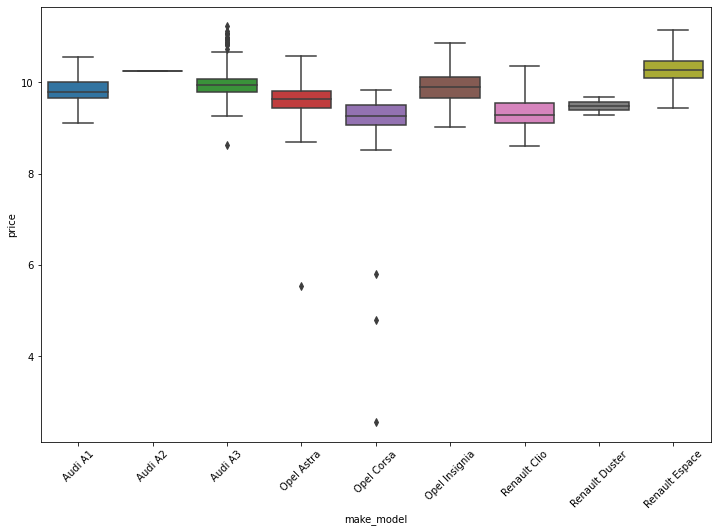

In [230]:
plt.figure(figsize = (12,8))
sns.boxplot(data=df,y=np.log(df.price),x="make_model",whis=2.3)
plt.xticks(rotation=45)
plt.show()

In [231]:
df.price.value_counts(ascending=True)

34815      1
9545       1
40745      1
36180      1
48490      1
        ... 
17990    102
15900    106
10990    139
15990    151
14990    154
Name: price, Length: 2956, dtype: int64

In [252]:
outlier_price=list(df.price.sort_values().head().index)
outlier_price

[8825, 8826, 8824, 13770, 8823]

In [248]:
df.drop(index=outlier_price,axis=0,inplace=True)

In [250]:
df.price.nsmallest(4)

8825     4990
8826     5250
8824     5300
13770    5445
Name: price, dtype: int64

In [251]:
df.price.nlargest()

3648     74600
15826    68320
3649     67600
3587     64900
15828    64332
Name: price, dtype: int64

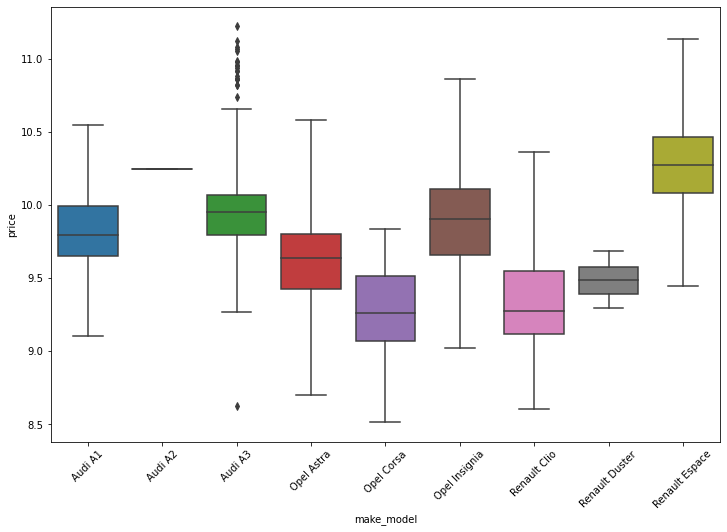

In [255]:
plt.figure(figsize = (12,8))
sns.boxplot(data=df,y=np.log(df.price),x="make_model",whis=2.3)
plt.xticks(rotation=45)
plt.show()

In [256]:
df.km.value_counts()

10.0       1044
1.0         367
5.0         170
50.0        148
100.0       139
           ... 
79930.0       1
1060.0        1
8329.0        1
73652.0       1
21197.0       1
Name: km, Length: 6687, dtype: int64

In [257]:
df.km.fillna(0)

0        56013.0
1        80000.0
2        83450.0
3        73000.0
4        16200.0
          ...   
15914        0.0
15915     9900.0
15916       15.0
15917       10.0
15918        0.0
Name: km, Length: 15914, dtype: float64

In [258]:
df[df.km==0]

,make_model,body_type,price,vat,km,registration,prev_owner,hp,Make,Model,Body Color,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Weight,Drive chain,Consumption,CO2 Emission,Emission Class,comfort,media,Extras,Safety & Security,Gears,Country version,Vehicle condition,particul_filter,Fuel Type
734,Audi A1,Sedans,30000,False,0.0,NaT,NaN,85.0,Audi,A1,White,Part leather,Sedans,5.0,[\n5\n],Semi-automatic,999.0,230,None,"[[4.8 l/100 km (comb)], [5.8 l/100 km (city)],...",108.0,Euro 6d-TEMP,"[Air conditioning, Seat ventilation, Split rea...","[Bluetooth, Radio]","[Alloy wheels, Sport suspension]","[ABS, Alarm system, Central door lock, Driver-...",7,[\nItaly\n],New,False,Gasoline
2370,Audi A1,Sedans,17999,False,0.0,NaT,NaN,70.0,Audi,A1,Black,None,Sedans,5.0,[\n5\n],Manual,999.0,35,None,"[[4.3 l/100 km (comb)], [5 l/100 km (city)], [...",98.0,Euro 6,None,None,None,None,5,[\nSpain\n],New,False,Gasoline
2496,Audi A1,Compact,22720,True,0.0,NaT,NaN,85.0,Audi,A1,White,Cloth,Compact,5.0,[\n5\n],Manual,999.0,80,None,"[[4.9 l/100 km (comb)], [6 l/100 km (city)], [...",111.0,NaN,"[Air conditioning, Electrical side mirrors, Li...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",6,None,New,False,Super 95
2501,Audi A1,Compact,22720,True,0.0,NaT,NaN,85.0,Audi,A1,Grey,Cloth,Compact,5.0,[\n5\n],Manual,999.0,None,None,"[[4.9 l/100 km (comb)], [6 l/100 km (city)], [...",111.0,Euro 6,"[Air conditioning, Electrical side mirrors, Li...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",6,None,New,False,Super 95
5017,Audi A3,Sedans,27470,True,0.0,NaT,NaN,85.0,Audi,A3,White,Cloth,Sedans,5.0,[\n5\n],Automatic,598.0,285,front,"[[4 l/100 km (comb)], [4.2 l/100 km (city)], [...",106.0,Euro 6,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport suspension, Voice Control]","[ABS, Driver drowsiness detection, Driver-side...",7,[\nSpain\n],New,False,Diesel
5553,Audi A3,Station wagon,23290,False,0.0,NaT,NaN,85.0,Audi,A3,Black,None,Station wagon,5.0,[\n5\n],Manual,999.0,265,None,"[[5 l/100 km (comb)], [5.8 l/100 km (city)], [...",114.0,Euro 6d-TEMP,"[Air conditioning, Electrical side mirrors, Hi...","[Bluetooth, CD player, MP3, On-board computer,...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock with remote control, D...",6,[\nGermany\n],New,False,Super E10 95
5607,Audi A3,Compact,22675,True,0.0,NaT,NaN,85.0,Audi,A3,Grey,Cloth,Compact,5.0,[\n5\n],Manual,999.0,255,front,"[[5 l/100 km (comb)], [], []]",114.0,Euro 6,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Voice Control]","[ABS, Alarm system, Central door lock with rem...",6,[\nBelgium\n],New,False,Gasoline
5668,Audi A3,Sedans,25400,True,0.0,NaT,NaN,85.0,Audi,A3,White,Cloth,Sedans,5.0,[\n5\n],Manual,999.0,80,front,"[[4.7 l/100 km (comb)], [5.7 l/100 km (city)],...",107.0,Euro 6,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport suspension, Voice Control]","[ABS, Driver drowsiness detection, Driver-side...",6,[\nSpain\n],New,False,Gasoline
5672,Audi A3,Sedans,25400,True,0.0,NaT,NaN,85.0,Audi,A3,White,Cloth,Sedans,5.0,[\n5\n],Manual,999.0,80,front,"[[4.7 l/100 km (comb)], [5.7 l/100 km (city)],...",107.0,Euro 6,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport suspension, Voice Control]","[ABS, Driver drowsiness detection, Driver-side...",6,[\nSpain\n],New,False,Gasoline
7698,Opel Astra,Sedans,26791,True,0.0,NaT,NaN,110.0,Opel,Astra,Grey,Cloth,Sedans,5.0,[\n5\n],Automatic,399.0,None,front,"[[6.1 l/100 km (comb)], [7.5 l/100 km (city)],...",139.0,Euro 6d-TEMP,"[A

In [259]:
df.registration

0       2016-01-01
1       2017-03-01
2       2016-02-01
3       2016-08-01
4       2016-05-01
           ...    
15914          NaT
15915   2019-01-01
15916   2019-03-01
15917   2019-06-01
15918   2019-01-01
Name: registration, Length: 15914, dtype: datetime64[ns]

In [260]:
df.first_registration

AttributeError: 'DataFrame' object has no attribute 'first_registration'

In [261]:
df['First Registration'].map(lambda x: float(x[1]), na_action = 'ignore')

KeyError: 'First Registration'